![hexagram30 small logo](https://avatars3.githubusercontent.com/u/37125516?s=100&v=4)

# Damped Second-Order System

## Setup

Preperatory steps for using Maxima in Jupyter:

In [1]:
set_plot_option([svg_file, "./maxplot.svg"])$
load(draw)$

## Previously Defined

In [2]:
K: 200;
P_0: 150;
t_n: (60*60*24*365.25);
r: 1/t_n;

(%o3)                                 200

(%o4)                                 150

(%o5)                             3.15576e+7

(%o6)                        3.168808781402895e-8

## Under-Damped Second Order System

A typical transient response for an under-damped second order system showing the system characteristics. the damping factor is 0.5. The terms represented are:

1. $t_{p} =$ peak time (time required to reach the first peak)
1. $t_{d} =$ delay time (time to reach 50% of final value for the first time)
1. $t_{r} =$ rise time (time to rise from 0 to 100% value)
1. $M_{p} =$ maximum overshoot

$$\beta(\zeta) = \sqrt{1-\zeta^2}$$

$$\theta(\zeta) = arctan\left(\frac{\beta(\zeta)}{\zeta}\right)$$

$$h_{under}(\zeta,t) = 1 - \frac{1}{\beta(\zeta)} e^{-\zeta \, t} \sin(t \, \beta(\zeta)+\theta(\zeta))$$

_Source_: Transient response. (n.d.). In Wikipedia. Retrieved January 21, 2019, from https://en.wikipedia.org/wiki/Transient_response

In [3]:
beta(zeta) := sqrt(1-zeta^2);
theta(zeta) := atan(beta(zeta)/zeta);
h_under(zeta,t) := 1 - beta(zeta)^-1*exp(-zeta*t)*sin(t*beta(zeta)+theta(zeta));

                                                    2
(%o7)                    beta(zeta) := sqrt(1 - zeta )

                                            beta(zeta)
(%o8)                   theta(zeta) := atan(----------)
                                               zeta

                                        - 1
(%o9) h_under(zeta, t) := 1 - beta(zeta)    exp((- zeta) t)
                                                sin(t beta(zeta) + theta(zeta))

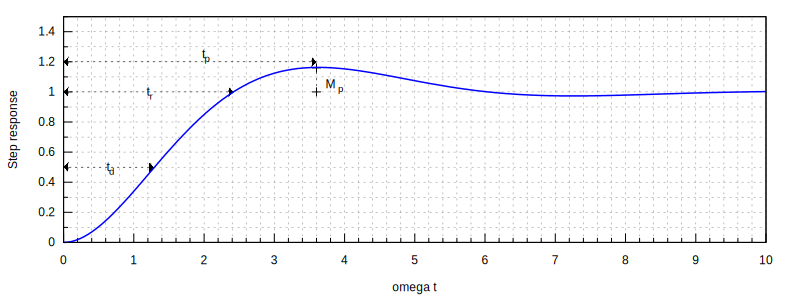

In [4]:
draw2d(dimensions=[800,300],
       terminal=svg,
       user_preamble="set mxtics; set mytics;",
       grid=true, 
       yrange=[0,1.5], 
       xlabel="omega t",
       xtics=1,
       key="",
       points_joined=true,
       head_both=true,
       head_length=0.1,
       line_width=0.5,
       line_type=dots,
       nticks=10,
       color=black,
       points([ [3.6,1],[3.6,1.16] ]),
       vector([0,1.2],[3.6,0]),
       label(["t_p",2.0,1.25]),
       label(["M_p",3.8,1.05]),
       vector([2.42,1],[-2.42,0]),
       label(["t_r",1.21,1]),
       vector([1.29,0.5],[-1.29,0]),
       label(["t_d",0.64,0.5]),
       line_width=1.5,
       line_type=solid,
       ylabel="Step response",
       nticks=100,
       color=blue,
       explicit(h_under(0.5, wt),wt,0,10))$

## Varying the Damping Ratio

We can view the equation above with different values for the damping ratio $\zeta$:

                             - 1
(%o11) h(z, t) := 1 - beta(z)    exp((- z) t) sin(t beta(z) + theta(z))

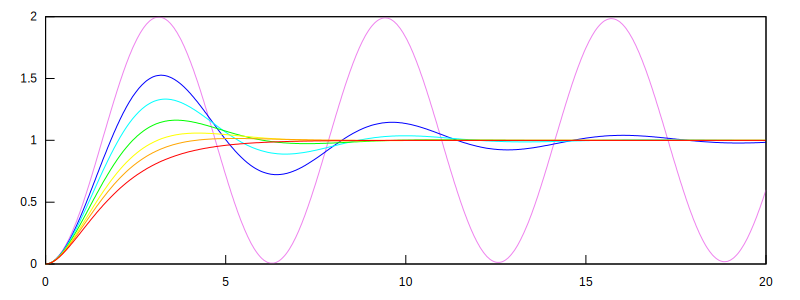

In [5]:
h(z,t) := 1 - beta(z)^-1*exp(-z*t)*sin(t*beta(z)+theta(z));

set_draw_defaults(dimensions=[800,300],
                  terminal=svg,
                  yrange=[0,2])$

draw2d(color=violet, 
       explicit(h(0.001,t),t,0,20),
       color=blue, 
       explicit(h(0.2,t),t,0,20),
       color=cyan, 
       explicit(h(0.33,t),t,0,20),
       color=green, 
       explicit(h(0.5,t),t,0,20),
       color=yellow,
       explicit(h(0.67,t),t,0,20),
       color=orange, 
       explicit(h(0.8,t),t,0,20),
       color=red, 
       explicit(h(0.999,t),t,0,20))$

### Undamped


$T = $ period

$\omega = \frac{2\pi}{T}$

$e^{i \omega t}$

                               K            %i 2 %pi
(%o14)                y(t) := (-) (1 + exp((--------) t))
                               2              t_n

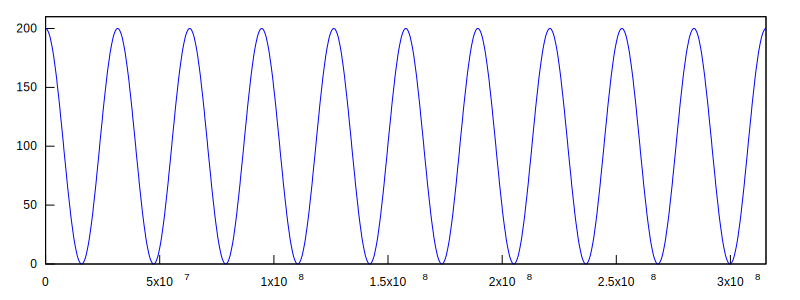

In [6]:
y(t) := K/2 * (1 + exp(%i * 2*%pi/t_n*t));

set_draw_defaults(dimensions=[800,300],
                  terminal=svg,
                  yrange=[0,K+10])$
                  
draw2d(color=blue, 
       explicit(y(t),t,0,10*t_n))$

### Underdamped

$e^{i \omega t \sqrt{1-\zeta^2}}$

where $0 \leqslant \zeta <$.


                          K            %i 2 %pi              2
(%o17)        y(z, t) := (-) (1 + exp((--------) t sqrt(1 - z )))
                          2              t_n

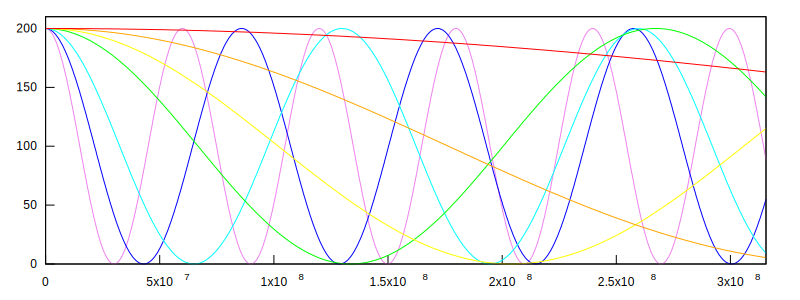

In [7]:
y(z,t) := K/2 * (1 + exp(%i * 2*%pi/t_n*t*sqrt(1-z^2)));

set_draw_defaults(dimensions=[800,300],
                  terminal=svg,
                  yrange=[0,K+10])$
                  
draw2d(color=violet, 
       explicit(y(0.85,t),t,0,10*t_n),
       color=blue, 
       explicit(y(0.93,t),t,0,10*t_n),
       color=cyan, 
       explicit(y(0.97,t),t,0,10*t_n),
       color=green, 
       explicit(y(0.993,t),t,0,10*t_n),
       color=yellow,
       explicit(y(0.997,t),t,0,10*t_n),
       color=orange, 
       explicit(y(0.999,t),t,0,10*t_n),
       color=red, 
       explicit(y(0.9999,t),t,0,10*t_n))$

### Overdamped

$e^{i \omega t \sqrt{1-\zeta^2}}$

where $\zeta > 1$.


                                    %i 2 %pi              2
(%o20)            y(z, t) := K exp((--------) t sqrt(1 - z ))
                                      t_n

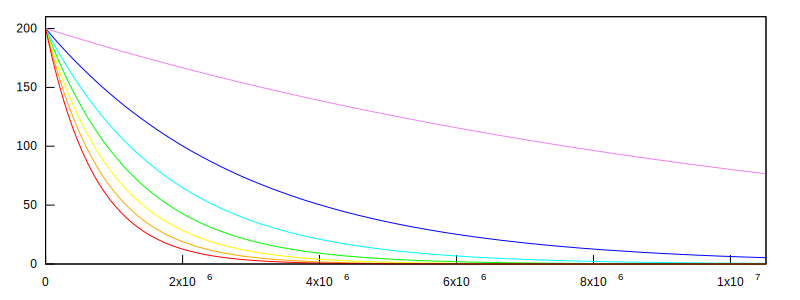

In [8]:
y(z,t) := K * exp(%i * 2*%pi/t_n*t*sqrt(1-z^2));

set_draw_defaults(dimensions=[800,300],
                  terminal=svg,
                  yrange=[0,K+10])$

/* Let's look at 4 months (t_n/3)
 */

draw2d(color=violet, 
       explicit(y(1.1,t),t,0,t_n/3),
       color=blue, 
       explicit(y(2,t),t,0,t_n/3),
       color=cyan, 
       explicit(y(3,t),t,0,t_n/3),
       color=green, 
       explicit(y(4,t),t,0,t_n/3),
       color=yellow,
       explicit(y(5,t),t,0,t_n/3),
       color=orange, 
       explicit(y(6,t),t,0,t_n/3),
       color=red, 
       explicit(y(7,t),t,0,t_n/3))$

### Critically Damped

$e^{i \omega \sqrt{1-\zeta^2 t}}$

where $\zeta = 1$.


                                    %i 2 %pi              2
(%o23)            y(z, t) := K exp((--------) t sqrt(1 - z ))
                                      t_n

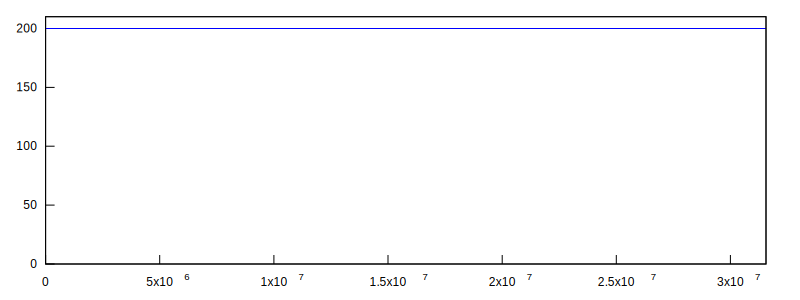

In [9]:
y(z,t) := K * exp(%i * 2*%pi/t_n*t*sqrt(1-z^2));

set_draw_defaults(dimensions=[800,300],
                  terminal=svg,
                  yrange=[0,K+10])$
                  
draw2d(color=blue, 
       explicit(y(1,t),t,0,t_n))$

### Inverse Overdamped Damped

$$y(z,t) = K \left(1 - e^{\frac{i 2 \pi}{t_n} t \sqrt{1-z^2}}\right)$$

                                      %i 2 %pi              2
(%o26)         y(z, t) := K (1 - exp((--------) t sqrt(1 - z )))
                                        t_n

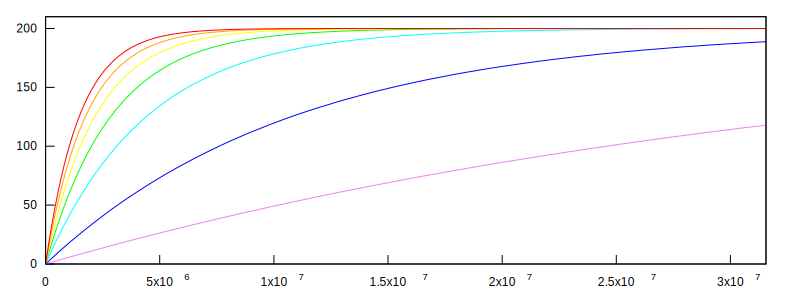

In [10]:
y(z,t) := K * (1 - exp(%i*2*%pi/t_n*t*sqrt(1-z^2)));

set_draw_defaults(dimensions=[800,300],
                  terminal=svg,
                  yrange=[0,K+10])$

draw2d(color=violet, 
       explicit(y(1.01,t),t,0,t_n),
       color=blue, 
       explicit(y(1.1,t),t,0,t_n),
       color=cyan, 
       explicit(y(1.5,t),t,0,t_n),
       color=green, 
       explicit(y(2,t),t,0,t_n),
       color=yellow,
       explicit(y(2.5,t),t,0,t_n),
       color=orange, 
       explicit(y(3,t),t,0,t_n),
       color=red, 
       explicit(y(3.5,t),t,0,t_n))$